In [12]:
""" !pip install -q astroquery
!pip install -q datetime
!pip install -q pymcel
!pip install -q plotly
!pip install nbformat """


' !pip install -q astroquery\n!pip install -q datetime\n!pip install -q pymcel\n!pip install -q plotly\n!pip install nbformat '

In [13]:
#Importando las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import math
from astroquery.jplhorizons import Horizons
from astropy import constants
import spiceypy as spy
import plotly.graph_objects as go


# Mecánica Celeste
## 2023-2
## Set de Problemas No 1: Problema de N-cuerpos

**1. Conceptos I.**
> ¿Qué es una fuerza conservativa? De ejemplos de fuerzas conservativas y no conservativas, y analice cómo afectan ambos tipos de fuerza a los sistemas físicos.

Respuesta// Una fuerza conservativa es aquella que cumple la característica de que el trabajo realizado por la fuerza para mover una partícula entre dos puntos es independiente de la trayectoria tomada entre esos dos puntos. En otras palabras, el trabajo neto realizado por una fuerza conservativa en un objeto que se mueve en un recorrido cerrado (es decir, que regresa a su punto de inicio) es cero. Esencialmente, en presencia de fuerzas puramente conservativas, la energía mecánica del sistema se conserva.

> Demuestre por cualquier método que la fuerza de gravedad es una fuerza conservativa.

Respuesta// Otra forma para demostrar que una fuerza es conservativa es cuando se cumple la relación:

$\mathbf{F} = -\nabla U(r)$


Así, tenemos que la fuerza gravitacional esta definida como:

$\mathbf{F} = -\frac{G m_1 m_2}{r^2} \hat{r}$

Así la energía potencial asociada a esta fuerza esta dada por:

$U(r) = -\frac{G m_1 m_2}{r}$

Tomando el gradiente del potencial respecto a r, tenemos que:

$\nabla U(r) = \frac{dU}{dr} \hat{r}$

$\nabla U(r) = \frac{G m_1 m_2}{r^2} \hat{r}$

Vemos que la fuerza gravitacional es simplemente el negativo del gradiente de la energía potencial gravitacional:

$\mathbf{F} = -\nabla U(r)$

Por lo tanto, hemos demostrado que la fuerza gravitacional es conservativa

**2. Conceptos II.** Dado un sistema de dos cuerpos con posiciones $\vec{r}_1$ y $\vec{r}_2$ respecto a un sistema de referencia con origen $\mathcal{O}$, cuyo centro  de masa se encuentra en $\vec{R}$ (ver Figura 1), demuestre que el vector de momentum angular total en el sistema de referencia de laboratorio es igual a la suma del momentum angular del centro de masa más el momentum de un cuerpo de masa $m_r = m_1m_2/(m_1+m_2)$ con respecto a un sistema de referencia con origen en el centro de masa. Es decir
  
  \begin{equation}
  \displaystyle \vec{L} = M\vec{R}\times \dot{\vec{R}} + m_r \vec{r}\times \dot{\vec{r}}
  \end{equation}
  
  donde, de acuerdo con la Figura 1, $\vec{r} = \vec{r}_{2c} - \vec{r}_{1c}$.


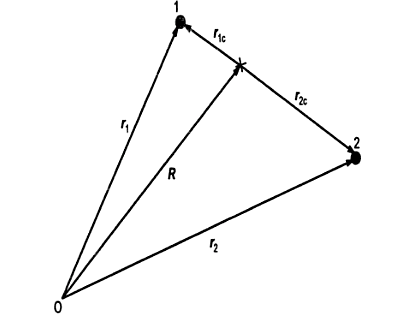
 Figura 1.

**Demostración**

$$\vec{r}=\vec{r_2}-\vec{r_1}$$

$$\vec{R}=\frac{m1\vec{r_1}+m2\vec{r_2}}{M}$$

Con esto, tenemos que la ecuación del momento angular para dos particulas esta descrita por:

$$\vec{L}=m1\vec{r_1}X\dot{\vec{r_1}}+m2\vec{r_2}X\dot{\vec{r_2}}$$

A partir de las anteriores ecuaciones, podemos despejar $\vec{r_1},\dot{\vec{r_1}},\vec{r_1},\dot{\vec{r_1}}$, usando el metodo de despeje preferido, podemos obtener que:

$$\vec{r_2}=\vec{R}+\frac{m1}{M}\vec{r}$$
$$\dot{\vec{r_2}}=\dot{\vec{R}}+\frac{m1}{M}\dot{\vec{r}}$$

$$\vec{r_1}=\vec{R}-\frac{m2}{M}\vec{r}$$
$$\dot{\vec{r_1}}=\dot{\vec{R}}-\frac{m2}{M}\dot{\vec{r}}$$

Reemplazando las expresiones anteriores en la expresión que teniamos para el momento angular L:

$$\vec{L}=m1[(\vec{R}-\frac{m2}{M}\vec{r})X(\dot{\vec{R}}-\frac{m2}{M}\dot{\vec{r}})]+m2[(\vec{R}+\frac{m1}{M}\vec{r})X(\dot{\vec{R}}+\frac{m1}{M}\dot{\vec{r}})]$$

Expandiendo el producto cruz entre vectores y cancelando los factores correspondientes ya que algunos son los inversos de otros, podemos obtener que:

$$\vec{L} = M\vec{R}\times \dot{\vec{R}} + m_r \vec{r}\times \dot{\vec{r}}$$

**3. Graficando el sistema solar.** Utilice Astroquery para consultar las posiciones de los planetas y planetas enanos del sistema solar para diferentes fechas, tal que alcance a completar al menos una órbita de cada cuerpo. Realice un gráfico en 3 dimensiones que muestra las órbitas de cada uno, con su respectiva etiqueta.

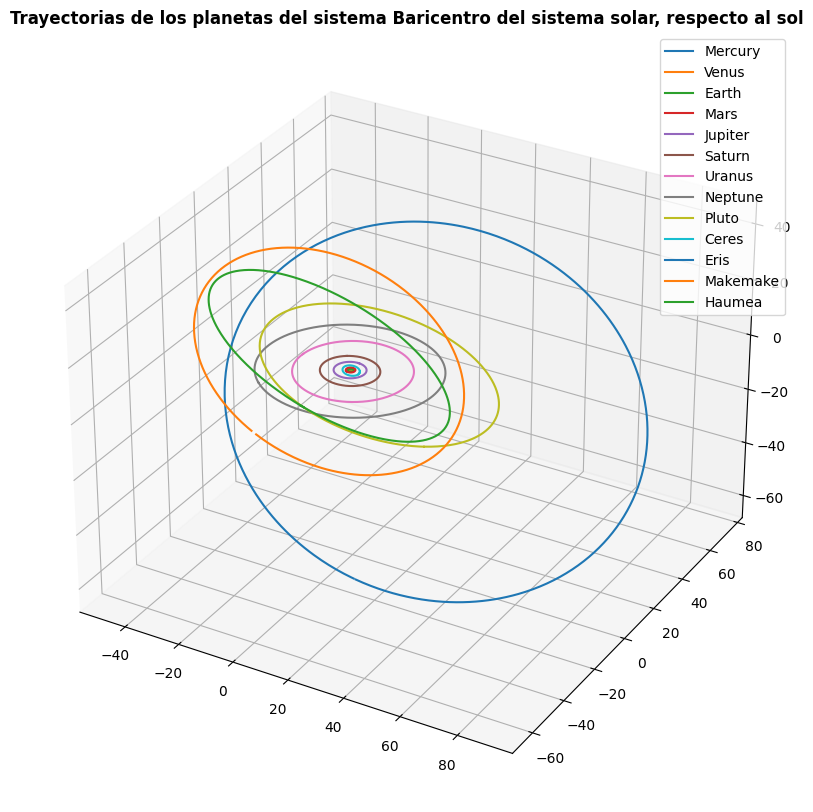

In [14]:
#Para este ejercicio podemos usar los datos de las posiciones de los planetas provenientes de astropy


#Nombre de los planetas
planet_names = {
    199: 'Mercury',
    299: 'Venus',
    399: 'Earth',
    499: 'Mars',
    599: 'Jupiter',
    699: 'Saturn',
    799: 'Uranus',
    899: 'Neptune',
    999: 'Pluto',
    
    '1;': 'Ceres',
    '136199;': 'Eris',
    '136472;': 'Makemake',
    '136108;': 'Haumea'
}
# Diccionario con los nombres de los planetas para una mejor identificación
planet_Period_in_days = {
    199: 88+20,          # Mercury
    299: 225+20,         # Venus
    399: 365.25+20,      # Earth
    499: 687+20,         # Mars
    599: 11.9 * 365.25+20,  # Jupiter
    699: 29.5 * 365.25+20,  # Saturn
    799: 84 * 365.25+20,    # Uranus
    899: 165 * 365.25+20,   # Neptune
    999: 248 * 365.25+20,           # Pluto
    '136199;': 558 * 365.25+20,           # Eris
    '1;': 5* 365.25+20,       # Ceres
    '136472;': 305 * 365.25+20,     # Makemake
    '136108;': 284 * 365.25+20      # Haumea
}

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

#Creando el Dataframe con la información de las posiciones de los planetas
df_position_planets = None
for i in planet_names.keys():
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    fecha_inicial = datetime.strptime('1800-01-01', '%Y-%m-%d')
    fecha_final = fecha_inicial + timedelta(days=planet_Period_in_days[i])
    step=math.ceil(planet_Period_in_days[i]/500)
    
    information = Horizons(id=str(i), location='@0', epochs={'start': f'{fecha_inicial}', 'stop': f'{fecha_final}', 'step': f'{step}d'}).vectors().to_pandas()[['datetime_str', 'x', 'y', 'z']]
    
    # Cambiar nombres de columnas para identificar a qué planeta pertenecen y agregar unidades correctamente
    ax.plot(information['x'], information['y'], information['z'], label=planet_names[i])
ax.axis('equal')
ax.legend()
ax.set_title("Trayectorias de los planetas del sistema Baricentro del sistema solar, respecto al sol", fontweight='bold')

plt.show()

**Haciendo el gráfico con Plotly**

In [15]:


# Diccionario unificado con la información de los planetas
planets_info = {
    199: {'name': 'Mercury', 'period': 88 + 20},
    299: {'name': 'Venus', 'period': 225 + 20},
    399: {'name': 'Earth', 'period': 365.25 + 20},
    499: {'name': 'Mars', 'period': 687 + 20},
    599: {'name': 'Jupiter', 'period': 11.9 * 365.25 + 20},
    699: {'name': 'Saturn', 'period': 29.5 * 365.25 + 20},
    799: {'name': 'Uranus', 'period': 84 * 365.25 + 20},
    899: {'name': 'Neptune', 'period': 165 * 365.25 + 20},
    999: {'name': 'Pluto', 'period': 248 * 365.25 + 20},
    '1;': {'name': 'Ceres', 'period': 5 * 365.25 + 20},
    '136199;': {'name': 'Eris', 'period': 558 * 365.25 + 20},
    '136472;': {'name': 'Makemake', 'period': 305 * 365.25 + 20},
    '136108;': {'name': 'Haumea', 'period': 284 * 365.25 + 20}
}

# Creando la figura con Plotly
fig = go.Figure()

for planet_id, planet_data in planets_info.items():
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    fecha_inicial = datetime.strptime('1800-01-01', '%Y-%m-%d')
    fecha_final = fecha_inicial + timedelta(days=planet_data['period'])
    step = math.ceil(planet_data['period'] / 500)
    
    information = Horizons(id=str(planet_id), location='@0', epochs={'start': f'{fecha_inicial}', 'stop': f'{fecha_final}', 'step': f'{step}d'}).vectors().to_pandas()
    
    fig.add_trace(go.Scatter3d(x=information['x'], y=information['y'], z=information['z'], mode='lines', name=planet_data['name']))

fig.update_layout(title="Trayectorias de los planetas del sistema Baricentro del sistema solar, respecto al sol", scene=dict(aspectmode='cube'))
fig.show()
fig.write_html("trayectorias_planetas.html")


**4. Las constantes del Sistema Solar.** Elija una fecha inicial para la cual va a obtener los datos de los 8 planetas del Sistema Solar (Puede utilizar SPICE para la solución de éste ejercicio).

1. Calcule la energía total del sistema formado por los 8 planetas y el Sol en Joules.  ¿Es positiva o negativa?.  Compare el orden de magnitud esa energía con el orden de magnitud de magnitud la energía cinética del planeta Júpiter.

2. Calcule la misma cantidad para un período de tiempo de 100 años (por ejemplo todo el siglo xx) en intervalos de entre 1 y 5 años.  Haga un gráfico de la energía como función del tiempo y muestre que el valor de esa cantidad es aproximadamente "constante", como lo predice la teoría.

3. Calcule el momentum angular total del sistema solar en la fecha del punto 1.  Recuerde que este vector define la normal al plano invariable de Laplace del sistema solar.  Repita el cálculo 100 años después y calcule el ángulo en el que el vector cambio. \
Ayuda: el ángulo entre dos vectores se calcula usando la propiedad del producto punto A⋅ B = A B cos θ.

4. Encuentre la inclinación del plano orbital de la Tierra respecto al plano invariable de Laplace del sistema solar calculado en 3 en la fecha inicial. \
Ayuda: el ángulo entre el plano de la órbita de la Tierra y el plano invariable de Laplace es igual al ángulo entre el vector momentum angular de la Tierra y el vector momentum angular total del sistema solar.

5. Repetir lo anterior con todos los planetas del sistema solar ¿cuál es el planeta que presenta la mayor inclinación? ¿cuál es el planeta que presenta la menor inclinación?


In [16]:
#Primero podemos obtener la información de las masas de los planetas y el sol en Kilogramos
#Codigo de la clase poara importar la libreria de SPICE la cual contiene la data necesaria para encontrar la masa de los planetas y el sol
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc -O gm_de440.tpc
spy.furnsh('gm_de440.tpc')

#Con el siguiente codigo obtenemos la masa de los planetas, y poniendo esta en un datfarame con los planetas como indices
dic={}
for i in range(1,9) :
  n,dato = spy.bodvrd(f'{i}99','GM',1)
  dato=dato/((constants.G.value)/10**9) #G debe de estar en las unidades correctas km^3/(kg*s^2)
  dic[f'{i}99']=dato[0]

#Añadiendo la masa del sol
dic['@sun']=constants.M_sun.value
G=constants.G.value

--2023-09-11 11:09:50--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc
Resolving naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 

137.78.232.95
Connecting to naif.jpl.nasa.gov (naif.jpl.nasa.gov)|137.78.232.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12708 (12K) [text/plain]
Saving to: ‘gm_de440.tpc’

gm_de440.tpc        100%[===================>]  12.41K  --.-KB/s    in 0.001s  

2023-09-11 11:09:51 (21.9 MB/s) - ‘gm_de440.tpc’ saved [12708/12708]



In [22]:
#Ahora podemos obtener información de las posiciones y la velocidad de los planetas y el sol en el sistema solar
planet_names = {
    '199': 'Mercury',
    '299': 'Venus',
    '399': 'Earth',
    '499': 'Mars',
    '599': 'Jupiter',
    '699': 'Saturn',
    '799': 'Uranus',
    '899': 'Neptune',
    '@sun':'sun'
}
df_planets_sun_information = None
for i in dic.keys():
    # Extrayendo los datos de los planetas en referencia al baricentro del sistema solar
    information = Horizons(id=i, location='@0', epochs={'start': '2002-07-26 00:00:00', 'stop': '2002-07-26 00:00:01', 'step': '90d'}).vectors().to_pandas()[['datetime_str', 'x', 'y', 'z', 'vx', 'vy', 'vz']]

    #Agregando la información de la masa al dataframe
    information['mass']=dic[i]

    #Convirtiendo las distancias de UA a metros
    information['x']=information['x']*149597870700
    information['y']=information['y']*149597870700
    information['z']=information['z']*149597870700

    #Ahora las velocidades de UA/dia a m/s
    information['vx']=information['vx']*149597870700/(24*60*60)
    information['vy']=information['vy']*149597870700/(24*60*60)
    information['vz']=information['vz']*149597870700/(24*60*60)

    #obtengamos la información de la magnitud de la velocidad para con esta obtener la energía cinética
    information['v']=np.sqrt(information['vx']**2+information['vy']**2+information['vz']**2)
    
    information['Ec'] = 0.5*information['mass']*information['v']**2  #esta energia esta en joules
    
    columns = {}
    for col in information.columns:
        if col in ['x','y','z']:
            columns[col] = f'{planet_names[i]}.{col} (m)'
        elif col in ['Ec']:
            columns[col] = f'{planet_names[i]}.{col} (Kg m^2/s^2)'
        elif col in ['mass']:
            columns[col] = f'{planet_names[i]}.{col} (Kg)'
        elif col in ['vx','vy','vz','v',]:
            columns[col] = f'{planet_names[i]}.{col} (m/s)'  
    information = information.rename(columns=columns)

    if df_planets_sun_information is None:
        df_planets_sun_information = information
    else:
        # Combinar DataFrames basado en la columna datetime_str
        df_planets_sun_information = df_planets_sun_information.merge(information, on='datetime_str', how='outer')

def potential_energy(m1, m2, x1, y1, z1, x2, y2, z2):
    r=((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**0.5
    return -(G * m1 * m2) / r

for planet in planet_names.values():
    df_planets_sun_information[planet + '.U (Kg m^2/s^2)'] = 0  # Inicializar columna de energía potencial
    
    for other_planet in planet_names.values():

        if planet != other_planet:
            U = potential_energy(df_planets_sun_information[planet + '.mass (Kg)'], df_planets_sun_information[other_planet + '.mass (Kg)'], df_planets_sun_information[planet + '.x (m)'], df_planets_sun_information[planet + '.y (m)'], df_planets_sun_information[planet + '.z (m)'], 
                                df_planets_sun_information[other_planet + '.x (m)'], df_planets_sun_information[other_planet + '.y (m)'], df_planets_sun_information[other_planet + '.z (m)'])
            df_planets_sun_information[planet + '.U (Kg m^2/s^2)'] += U / 2  # Dividiendo cada interacción entre 2 para evitar la duplicación

pd.set_option('display.max_columns', None)

df_planets_sun_information

,datetime_str,Mercury.x (m),Mercury.y (m),Mercury.z (m),Mercury.vx (m/s),Mercury.vy (m/s),Mercury.vz (m/s),Mercury.mass (Kg),Mercury.v (m/s),Mercury.Ec (Kg m^2/s^2),Venus.x (m),Venus.y (m),Venus.z (m),Venus.vx (m/s),Venus.vy (m/s),Venus.vz (m/s),Venus.mass (Kg),Venus.v (m/s),Venus.Ec (Kg m^2/s^2),Earth.x (m),Earth.y (m),Earth.z (m),Earth.vx (m/s),Earth.vy (m/s),Earth.vz (m/s),Earth.mass (Kg),Earth.v (m/s),Earth.Ec (Kg m^2/s^2),Mars.x (m),Mars.y (m),Mars.z (m),Mars.vx (m/s),Mars.vy (m/s),Mars.vz (m/s),Mars.mass (Kg),Mars.v (m/s),Mars.Ec (Kg m^2/s^2),Jupiter.x (m),Jupiter.y (m),Jupiter.z (m),Jupiter.vx (m/s),Jupiter.vy (m/s),Jupiter.vz (m/s),Jupiter.mass (Kg),Jupiter.v (m/s),Jupiter.Ec (Kg m^2/s^2),Saturn.x (m),Saturn.y (m),Saturn.z (m),Saturn.vx (m/s),Saturn.vy (m/s),Saturn.vz (m/s),Saturn.mass (Kg),Saturn.v (m/s),Saturn.Ec (Kg m^2/s^2),Uranus.x (m),Uranus.y (m),Uranus.z (m),Uranus.vx (m/s),Uranus.vy (m/s),Uranus.vz (m/s),Uranus.mass (Kg),Uranus.v (m/s),Uranus.Ec (Kg m^2/s^2),Neptune.x (m),Neptune.y (m),Neptune.z (m),Neptune.vx (m/s),Neptune.vy (m/s),Neptune.vz (m/s),Neptune.mass (Kg),Neptune.v (m/s),Neptune.Ec (Kg m^2/s^2),sun.x (m),sun.y (m),sun.z (m),sun.vx (m/s),sun.vy (m/s),sun.vz (m/s),sun.mass (Kg),sun.v (m/s),sun.Ec (Kg m^2/s^2),Mercury.U (Kg m^2/s^2),Venus.U (Kg m^2/s^2),Earth.U (Kg m^2/s^2),Mars.U (Kg m^2/s^2),Jupiter.U (Kg m^2/s^2),Saturn.U (Kg m^2/s^2),Uranus.U (Kg m^2/s^2),Neptune.U (Kg m^2/s^2),sun.U (Kg m^2/s^2)
0,A.D. 2002-Jul-26 00:00:00.0000,-4.193975e+10,2.831849e+10,6.235193e+09,-37707.684829,-37995.124696,357.416531,3.301001e+23,53531.549038,4.729718e+32,-4.900757e+10,-9.754072e+10,1.512949e+09,31009.971442,-15984.021176,-2008.054384,4.867306e+24,34944.807114,2.971830e+33,8.239054e+10,-1.284627e+11,6.758859e+06,24553.540572,16033.191842,0.035064,5.972168e+24,29324.726687,2.567852e+33,-1.619359e+11,1.853422e+11,7.884153e+09,-17347.506618,-13837.480898,136.262223,6.416909e+23,22190.773552,1.579941e+32,-3.640981e+11,6.944822e+11,5.267001e+09,-11733.980094,-5444.256445,285.263664,1.898125e+27,12938.608597,1.588802e+35,2.310454e+11,1.331912e+12,-3.236852e+10,-10029.336613,1628.326739,371.218853,5.683174e+26,10167.4404,2.937543e+34,2.496623e+12,-1.650162e+12,-3.847868e+10,3705.030718,5364.14094,-27.902038,8.680987e+25,6519.358801,1.844798e+33,2.863555e+12,-3.473839e+12,5.543696e+09,4157.850179,3488.632989,-167.202936,1.024093e+26,5430.122933,1.509832e+33,2.489204e+07,-7.923043e+08,5.629245e+06,13.557341,4.321345,-0.363633,1.988410e+30,14.234035,2.014336e+32,-4.257577e+32,-2.977880e+33,-2.608813e+33,-1.725738e+32,-1.605204e+35,-2.791530e+34,-1.927051e+33,-1.511420e+33,-1.979673e+35


In [28]:
import numpy as np

# Suponemos que G, dic, y df_planets_sun_information ya están definidos como antes

# Convertir columnas relevantes a arrays de numpy
masses = np.array([df_planets_sun_information[f'{planet}.mass (Kg)'].iloc[0] for planet in planet_names.values()])
x = np.array([df_planets_sun_information[f'{planet}.x (m)'].iloc[0] for planet in planet_names.values()])
y = np.array([df_planets_sun_information[f'{planet}.y (m)'].iloc[0] for planet in planet_names.values()])
z = np.array([df_planets_sun_information[f'{planet}.z (m)'].iloc[0] for planet in planet_names.values()])
vx = np.array([df_planets_sun_information[f'{planet}.vx (m/s)'].iloc[0] for planet in planet_names.values()])
vy = np.array([df_planets_sun_information[f'{planet}.vy (m/s)'].iloc[0] for planet in planet_names.values()])
vz = np.array([df_planets_sun_information[f'{planet}.vz (m/s)'].iloc[0] for planet in planet_names.values()])

# Calcular la energía cinética con numpy
v = np.sqrt(vx**2 + vy**2 + vz**2)
Ec_array = 0.5 * masses * v**2


# Calcular la energía potencial con numpy como antes
def potential_energy_array(i, j):
    r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
    return -(G * masses[i] * masses[j]) / r

U_total = 0
for i in range(len(masses)):
    for j in range(i+1, len(masses)):
        U_total += potential_energy_array(i, j)

# Energía cinética total
EcT = np.sum(Ec_array)

# Energía total
ET = EcT + U_total

print(f'Energía Cinética Total: {EcT}')
print(f'Energía Potencial Total: {U_total}')
print(f'Energía Mecánica Total: {ET}')
print(f'-2 veces la Energía Cinética Total: {-2*EcT}')


Energía Cinética Total: 1.9798237677728146e+35
Energía Potencial Total: -3.960264886819842e+35
Energía Mecánica Total: -1.9804411190470272e+35
-2 veces la Energía Cinética Total: -3.959647535545629e+35


Como se puede observar en el DataFrame anterior  se cumplen las condiciones de que:

$$<U> \approx  -2<K>$$
$$<E> \approx  -<K>$$

por tanto el sistema esta virializado

**5. Problema de 3 cuerpos II.** Considere tres cuerpos $m_1$, $m_2$ y $m_3$, tal que $m_1 > m_2 >> m_3$, los cuales interactuan gravitacionalmente. En un instante $t_0=0$ las masas están ubicadas en los vértices de un trángulo equilatero de lado $d$.

> Encuentre la dirección y la magnitud de la fuerza que experimenta la masa $m_3$ en el instante $t_0$.

> Asigne valores a las cantidades $m_1$, $m_2$, $m_3$ y $d$, de forma que tengan algun sentido físico.

> Cree un sistema de unidades canónico con base en estos valores.

> Simule el movimiento del sistema usando diferentes vectores de velocidad en el instante $t_0$ y diferentes valores para $m_1$, $m_2$ y $m_3$. Trate de conseguir un sistema estable. ¿Qué observa?


**6. El Virial.** En un sistema de $n$ cuerpos, la fuerza que actua sobre $m_i$ es $F_i$. Muestre que:

\begin{equation}
\frac{1}{2}\ddot{I} = 2T + \sum_i \vec{r_i} \cdot \vec{F_i}
\end{equation}

donde $I$ es el momento de inercia y $T$ es la energía cinética.

> Demuestre que el virial de un sistema de N cuerpos es igual a su energía potencial y a partir de allí deduzca la identidad de Lagrange-Jacobi. ¿Qué interpretación permite dicha identidad?

> Finalmente, deduzca e interprete el teorema del virial.

**7. El virial en la práctica.** Nos proponemos evaluar las condiciones del teorema del virial en el sistema solar.  Para ello es necesario calcular la energía cinética, la energía potencial y la energía total del sistema por un tiempo prolongado.

1. Elija una fecha inicial arbitraria, calcule las posiciones y velocidades del Sol, Júpiter y Saturno a lo largo de 100 años en intervalos de 1 mes.
2. Calcule la energía cinética (K), la energía potencial (U) y la energía total del sistema en todos los tiempos anteriores. ¿Qué observa? Explique.
3. En el tiempo inicial, calcule las fuerzas que siente cada cuerpo y use la fórmula original del virial para V=∑ rᵢ⋅ Fᵢ para calcular su valor.  Compárelo con el valor de la energía potencial en ese tiempo inicial ¿Qué observa? Explique.
4. Encuentre el promedio de K, U y E.  ¿Se cumple el teorema del virial para el sistema Sol, Júpiter y Saturno?

**8. Simulación de $N$ cuerpos.** Gliese 667-C es un sistema planetario con 5 planetas descubiertos. Consulte las propiedades de dicho sistema (masas, radios, etc.) y desarrolle:

> a. Elija unas condiciones iniciales y un conjunto de unidades canónicas apropiados, e integre las ecuaciones de movimiento, de forma que el sistema se mantenga estable (suponga que la estrella central se encuentra en reposo en el origen).

> b. Calcule la posición del centro de masas.

> c. Calcule el momentum angular total del sistema.

> d. Encuentre el plano invariante del sistema.

**9. Aproximación de un cometa.** Considere una partícula de masa despreciable en el sistema solar (un cometa), que se encuentra a 15 unidades astronómicas del Sol. Estudie numéricamente el movimiento de dicho cuerpo:

1. Considerando los todos los planetas del sistema solar.
2. Despreciando completamente los 4 planetas interiores.
3. Añadiendo las masas de los planetas interiores al Sol. \
Nota: A esto se le conoce como "tirar los planetas dentro del Sol." Léase la sección 9.5 del libro *Fundamentals of celestial mechanics*, J.M.A Danby, segunda edición.